In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
# option so we can always see all columns
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_excel('real_estate_withheaders.xls')

# Feature selection, multicollinearity (numbers) 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [ ]:
#if categories were dominant then i would think the chi squared test 

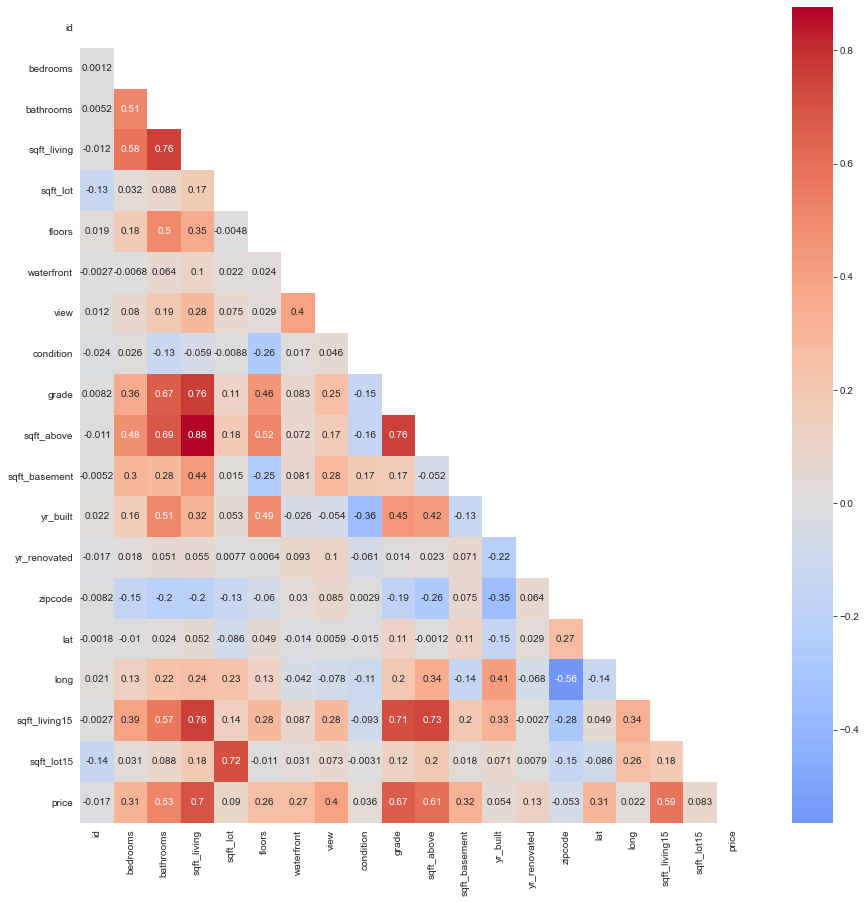

In [4]:
fig, ax = plt.subplots(figsize=(15,15))

mask=np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)]=True

sns.heatmap(df.corr(), mask=mask, annot=True, cmap='coolwarm', center=0)

plt.show()

In [5]:
#corr matrix with absolute numbers 
corr_matrix =df.corr().abs()

In [6]:
price_impact = corr_matrix['price']

In [7]:
price_impact.sort_values(ascending=True)

id               0.016772
long             0.022036
condition        0.036056
zipcode          0.053402
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [8]:
df=df.drop(columns=['id','long','sqft_above'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_basement  21597 non-null  int64         
 11  yr_built       21597 non-null  int64         
 12  yr_renovated   21597 non-null  int64         
 13  zipcode        21597 non-null  int64         
 14  lat            21597 non-null  float64       
 15  sqft_living15  2159

# feature engineering 

In [10]:
df['date'][5]

Timestamp('2014-05-12 00:00:00')

In [11]:
df['month']=pd.DatetimeIndex(df['date']).month
#df['quarter']

In [12]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,price,month
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,1340,5650,221900,10
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,1690,7639,538000,12
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,2720,8062,180000,2
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,1360,5000,604000,12
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,1800,7503,510000,2


In [13]:
#seattle - its very grey and rainy in the winter - summer price bubble ? 

def season(x):
    if x<4:
        return 'winter'
    elif x<10:
        return 'summer'
    else:
        return 'winter'

In [14]:
df['season']=list(map(season, df['month']))

In [15]:
df=df.drop(columns=['date','month'])

In [16]:
#year built - more useful to know the age of the property - bucketed into age groups 
#- 3 clusters, pre 1930, pre 1980 and post 1980
df['yr_built'][1]

1951

In [17]:
def era(x):
    if x<1938:
        return 'prewar'
    elif x<1980:
        return 'the_rest'
    else:
        return 'new_homes'

df['built_era']=list(map(era, df['yr_built']))

In [18]:
df['age']=2015-df['yr_built']

In [19]:
df=df.drop(columns=['yr_built'])

In [20]:
#other columns - yr renovated, view, waterfront, basement 

In [21]:
round((df['yr_renovated']!=0).sum()/sum(df['yr_renovated'].value_counts())*100,2)

4.23

In [22]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [23]:
def boolean(x):
    if x == 0:
        n = 0
    elif x > 0:
        n = 1
    return n
#generic apply to any column we want to turn into a true false 
#or use astype(bool)
#maybe combine the era with the yr renovated - to classify the value of the renovation - sians homework 

In [24]:
df['renovated']=df['yr_renovated'].apply(boolean).astype('bool') #new
df['view']=df['view'].apply(boolean).astype('bool')#overwrite
df['sqft_basement']=df['sqft_basement'].apply(boolean).astype('bool')#overwrite

In [25]:
for c in df.columns.tolist():
    print(c, len(df[c].unique()))

bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 2
condition 5
grade 11
sqft_basement 2
yr_renovated 70
zipcode 70
lat 5033
sqft_living15 777
sqft_lot15 8682
price 3622
season 2
built_era 3
age 116
renovated 2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  bool   
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_basement  21597 non-null  bool   
 10  yr_renovated   21597 non-null  int64  
 11  zipcode        21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  sqft_living15  21597 non-null  int64  
 14  sqft_lot15     21597 non-null  int64  
 15  price          21597 non-null  int64  
 16  season         21597 non-null  object 
 17  built_era      21597 non-null  object 
 18  age   

<AxesSubplot:xlabel='season', ylabel='count'>

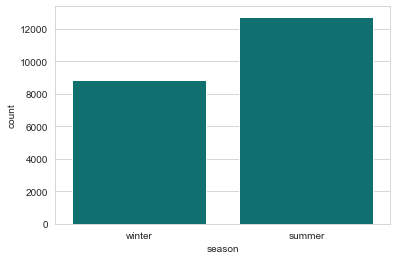

In [27]:
sns.countplot(x=df['season'], color="teal")

<AxesSubplot:xlabel='built_era', ylabel='count'>

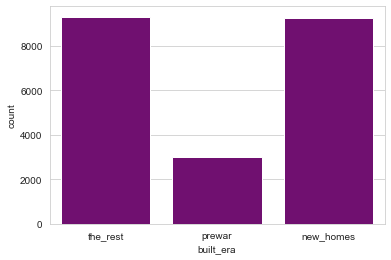

In [28]:
sns.countplot(x=df['built_era'], color="purple")

# Correlation and distribution of all numeric columns 

In [30]:
numerical= df.select_dtypes(include='number')

In [31]:
numerical.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,price,age
0,3,1.00,1180,5650,1.0,0,3,7,0,98178,47.5112,1340,5650,221900,60
1,3,2.25,2570,7242,2.0,0,3,7,1991,98125,47.7210,1690,7639,538000,64
2,2,1.00,770,10000,1.0,0,3,6,0,98028,47.7379,2720,8062,180000,82
3,4,3.00,1960,5000,1.0,0,5,7,0,98136,47.5208,1360,5000,604000,50
4,3,2.00,1680,8080,1.0,0,3,8,0,98074,47.6168,1800,7503,510000,28


In [35]:
numerical.corr(method='pearson').sort_values(['price'], ascending=False)['price'][1:11]

sqft_living      0.701917
grade            0.667951
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
Name: price, dtype: float64

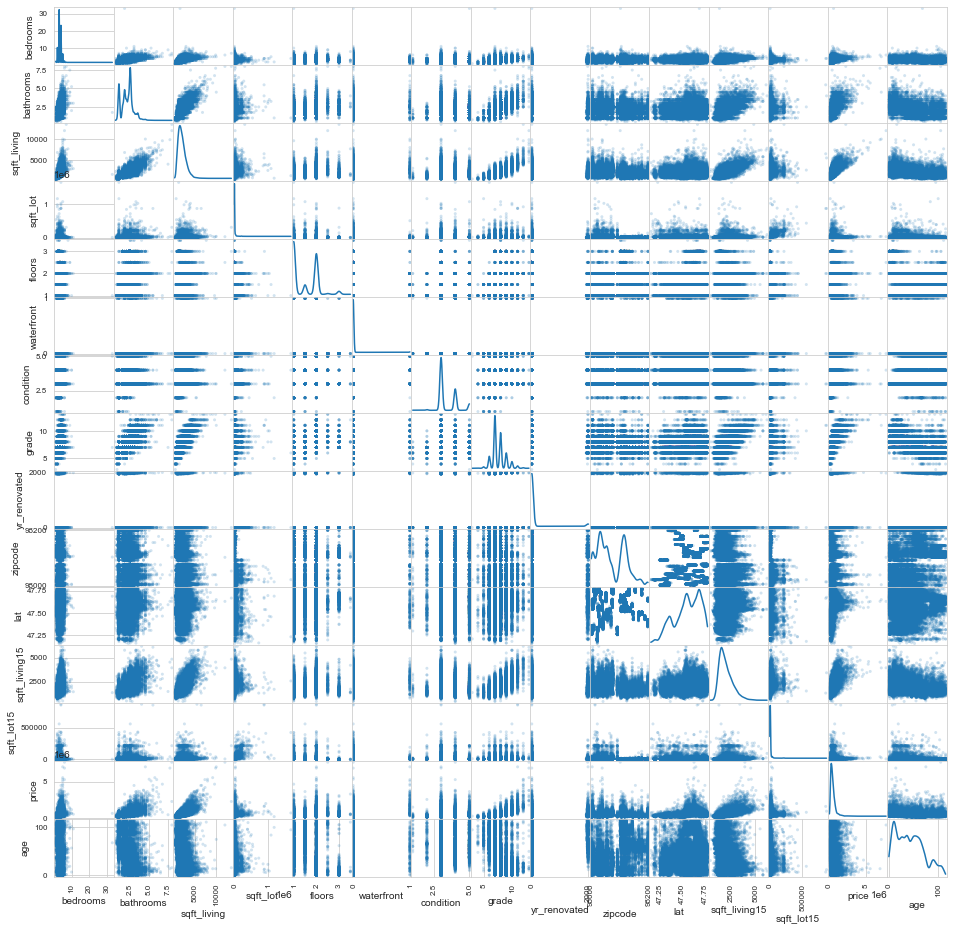

In [36]:
pd.plotting.scatter_matrix(numerical, alpha=0.2, figsize=(16,16), grid=True, diagonal='kde');

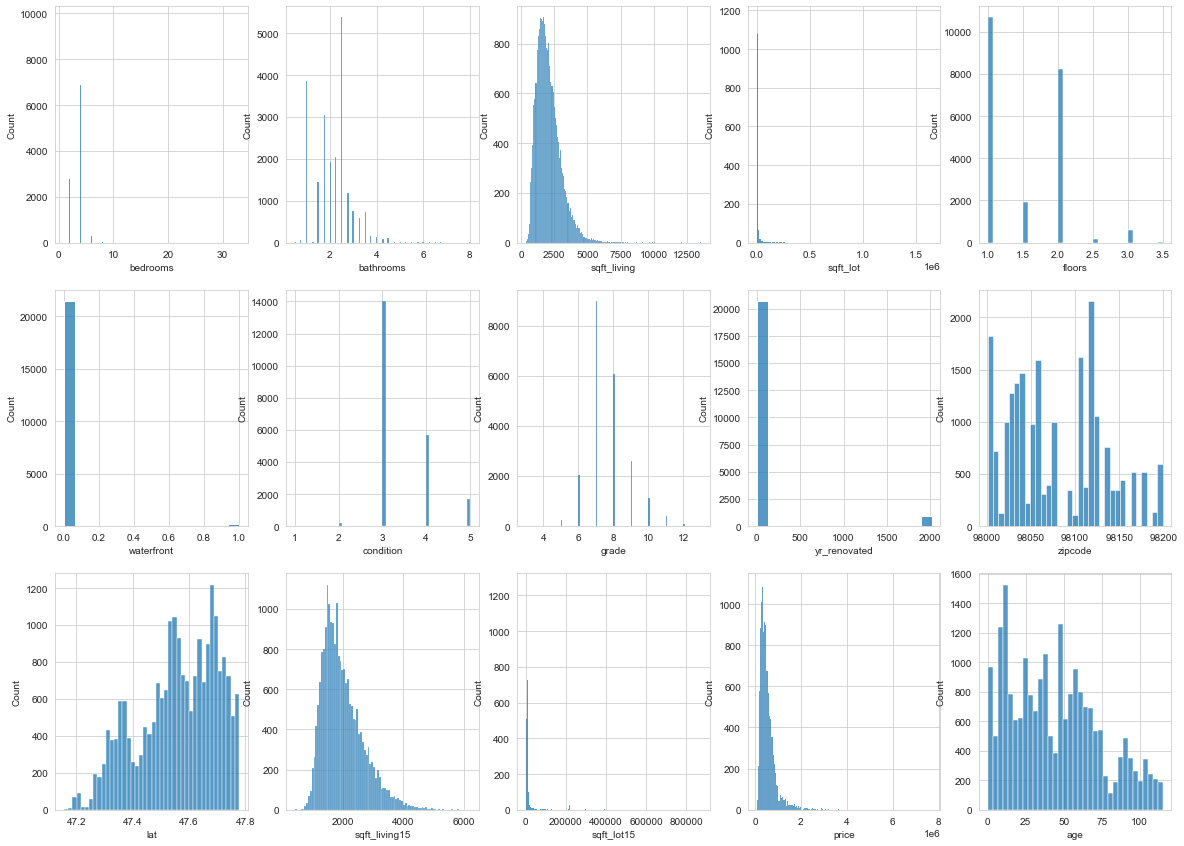

In [37]:
plt.figure(figsize=(20,20))
for i, column in enumerate(numerical.columns, 1):
    plt.subplot(4,5,i)
    sns.histplot(numerical[column]);

# EDA for more in depth questions 

In [38]:
#is there a summer price hike ? 
df['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [39]:
df_waterfront=df[df['waterfront'] == 1]


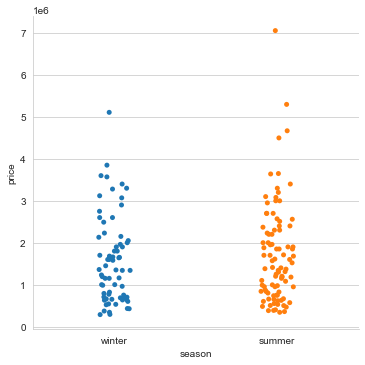

In [40]:
sns.catplot(x="season", y="price", data=df_waterfront)

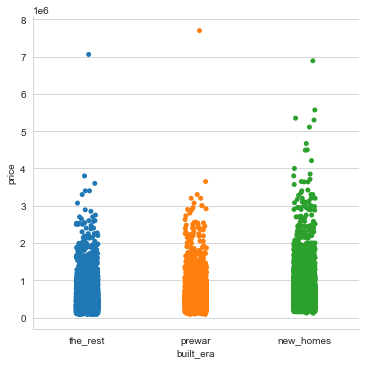

In [41]:
#does era have a strong impact on price ? 
sns.catplot(x="built_era", y="price", data=df)

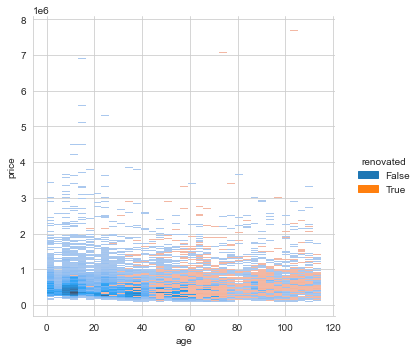

In [42]:
#what about age 

sns.displot(y="price", x="age",hue='renovated',data=df);

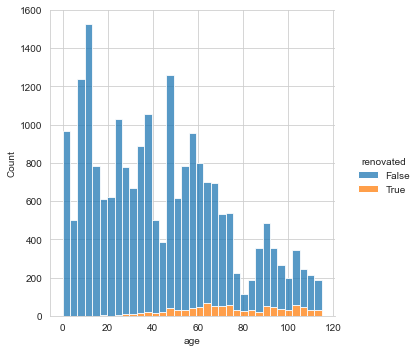

In [43]:
#dive into age and if renovated 
sns.displot(x="age",hue='renovated',data=df,multiple="stack");

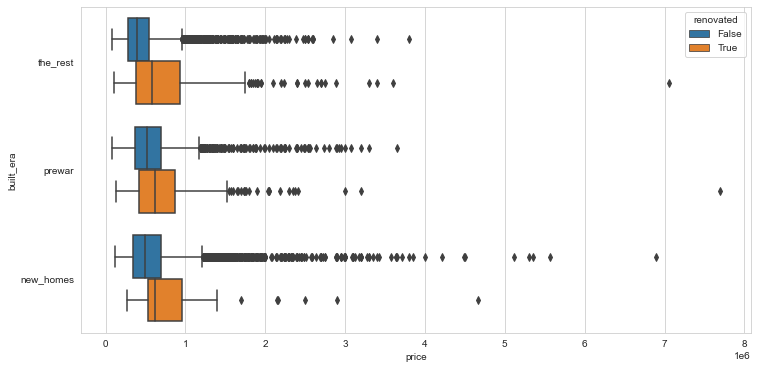

In [44]:
#sians homework, analyse era against renovated y/n 
plt.figure(figsize=(12,6)) 
sns.boxplot(y="built_era", x="price", hue="renovated",data=df);

# looking at correlation between categories with cross tabs and Chi squared 

In [50]:
df['price_group']=(df['price']/200000).apply(np.ceil).astype('object')
#categorical version of price 

In [ ]:
df['price_group'].value_counts()

In [52]:
df_filter_price=df[df['price_group']<19]

In [53]:
cat=df_filter_price.select_dtypes(exclude='number')

In [54]:
cat.head()

,view,sqft_basement,season,built_era,renovated,price_group
0,False,False,winter,the_rest,False,2.0
1,False,True,winter,the_rest,True,3.0
2,False,False,winter,prewar,False,1.0
3,False,True,winter,the_rest,False,4.0
4,False,False,winter,new_homes,False,3.0


In [55]:
cat.shape

(21577, 6)

In [58]:
contingency=pd.crosstab(cat.price_group,[cat.built_era,cat.renovated,cat.view,cat.season,cat.sqft_basement],normalize='all').round(4)

In [59]:
contingency

built_era     new_homes                                                  \
renovated         False                                                   
view              False                            True                   
season           summer          winter          summer          winter   
sqft_basement     False    True   False    True   False    True   False   
price_group                                                               
1.0              0.0018  0.0006  0.0018  0.0004  0.0000  0.0000  0.0000   
2.0              0.0650  0.0175  0.0485  0.0140  0.0008  0.0006  0.0008   
3.0              0.0561  0.0206  0.0343  0.0130  0.0024  0.0018  0.0011   
4.0              0.0336  0.0092  0.0196  0.0055  0.0020  0.0017  0.0016   
5.0              0.0147  0.0038  0.0092  0.0026  0.0013  0.0016  0.0009   
6.0              0.0038  0.0019  0.0023  0.0013  0.0006  0.0013  0.0004   
7.0              0.0023  0.0012  0.0009  0.0010  0.0005  0.0015  0.0003   
8.0              0.0010  0.0006  0.0010  0.0005  0.0003  0.0006  0.0001   
9.0              0.0007  0.0004  0.0006  0.0003  0.0002  0.0005  0.0002   
10.0             0.0005  0.0001  0.0005  0.0002  0.0002  0.0003  0.0002   
11.0             0.0002  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
12.0             0.0002  0.0002  0.0001  0.0000  0.0001  0.0003  0.0000   
13.0             0.0000  0.0001  0.0000  0.0000  0.0001  0.0002  0.0000   
14.0             0.0000  0.0000  0.0001  0.0000  0.0000  0.0001  0.0000   
15.0             0.0000  0.0001  0.0000  0.0000  0.0000  0.0002  0.0001   
16.0             0.0000  0.0000  0.0000  0.0000  0.0001  0.0002  0.0000   
17.0             0.0000  0.0000  0.0000  0.0000  0.0000  0.0001  0.0000   
18.0             0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   

built_era                                                              prewar  \
renovated                True                                           False   
view                    False                        True               False   
season                 summer       winter         summer      winter  summer   
sqft_basement    True   False True   False    True  False True  False   False   
price_group                                                                     
1.0            0.0000  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0026   
2.0            0.0001  0.0001  0.0  0.0001  0.0000    0.0  0.0    0.0  0.0114   
3.0            0.0016  0.0003  0.0  0.0001  0.0001    0.0  0.0    0.0  0.0108   
4.0            0.0010  0.0001  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0047   
5.0            0.0008  0.0000  0.0  0.0001  0.0000    0.0  0.0    0.0  0.0017   
6.0            0.0006  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0001   
7.0            0.0010  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0003   
8.0            0.0006  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0001   
9.0            0.0005  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0001   
10.0           0.0004  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0000   
11.0           0.0001  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0000   
12.0           0.0002  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0000   
13.0           0.0000  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0000   
14.0           0.0001  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0000   
15.0           0.0001  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0000   
16.0           0.0000  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0000   
17.0           0.0000  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0000   
18.0           0.0000  0.0000  0.0  0.0000  0.0000    0.0  0.0    0.0  0.0000   

built_era                                                                      \
renovated                                                                True   
view                                     True                           False   
season     

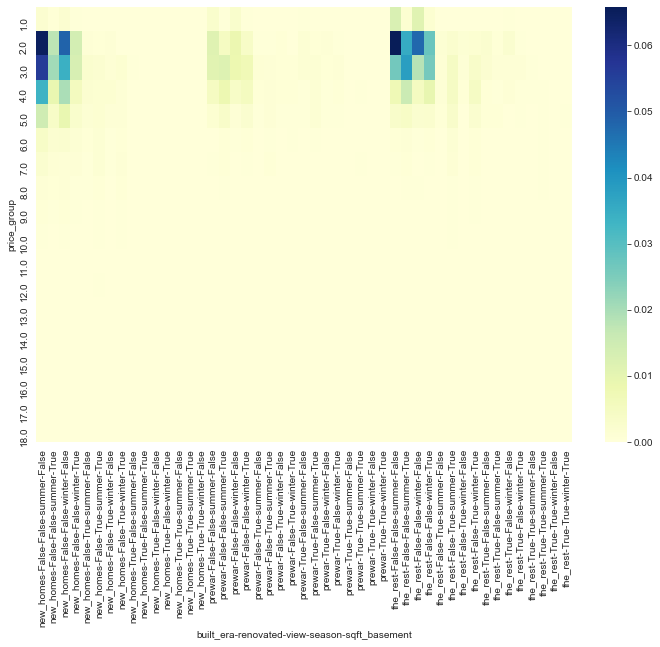

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, cmap="YlGnBu");

In [62]:
from scipy.stats import chi2_contingency 
from scipy.stats import chi2

In [ ]:
# we take 2 columns (categories) and look for independence 

# Ho - these variables have no association or correlation 
# Ha - these variables are associated or we have correlation between them 

In [63]:
#crosstab - renovated and built era 
contingency2=pd.crosstab(cat.renovated,cat.built_era)

In [64]:
contingency2

built_era,new_homes,prewar,the_rest
renovated,,,
False,9220,2608,8838
True,33,404,474


In [65]:
# chi statistic 'c',
# p value - in general if <0.05 - evidence of a significant relationship 
# dof n-1
# expected ... ? 

c,p,dof,expected = chi2_contingency(contingency2,correction=False)


In [70]:
if p<=0.05:
    print('dependent (reject H0)')
else:
    print('independent (fail to reject H0)')

dependent (reject H0)


In [ ]:
# CONSIDER dropping either of these fields 
#- because they are highly correlated 
#-similar to correlated pairs in the corr_matrix

In [76]:
contingency3=pd.crosstab(cat.season,cat.sqft_basement)
contingency3

sqft_basement,False,True
season,,
summer,7706,5021
winter,5400,3450


In [77]:
c,p,dof,expected=chi2_contingency(contingency3,correction=False)

In [78]:
if p<= 0.05:
    print('dependent- reject H0')
else:
    print('looks independent - fail to reject H0')

looks independent - fail to reject H0


In [79]:
#test statistic itself 
probability =0.95
critical_value=chi2.ppf(probability,dof)
if abs(c) >=critical_value:
    print('dependent - reject H0')
else:
    print ('looks independent - fail to reject H0')

looks independent - fail to reject H0


In [ ]:
# use random forest to help us select important features 
# ml model - supervised or unsupervised format 
# decision trees x N - 100 (random forest - wisdom of many)
# randomforestregressor - predicting price - everything is a number 

In [103]:
cat=df.select_dtypes(exclude='number')

In [104]:
cat

,view,sqft_basement,season,built_era,renovated,price_group
0,False,False,winter,the_rest,False,2.0
1,False,True,winter,the_rest,True,3.0
2,False,False,winter,prewar,False,1.0
3,False,True,winter,the_rest,False,4.0
4,False,False,winter,new_homes,False,3.0
...,...,...,...,...,...,...
21592,False,False,summer,new_homes,False,2.0
21593,False,False,winter,new_homes,False,2.0
21594,False,False,summer,new_homes,False,3.0
21595,False,False,winter,new_homes,False,2.0


In [105]:
cat=cat.drop(columns='price_group')

In [106]:
cat.shape

(21597, 5)

In [107]:
X_categorical=pd.get_dummies(cat,drop_first=True)

In [108]:
X_categorical.head(1)

,view,sqft_basement,renovated,season_winter,built_era_prewar,built_era_the_rest
0,False,False,False,1,0,1


In [94]:
X_numerical=df.select_dtypes(include='number')

In [99]:
X_numerical.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,price,age
0,3,1.0,1180,5650,1.0,0,3,7,0,98178,47.5112,1340,5650,221900,60


In [ ]:
# normally might do some scaling after dealing with outliers at this point 

In [96]:
X_categorical.shape

(21597, 6)

In [97]:
X_numerical.shape

(21597, 15)

In [101]:
data=pd.concat((X_categorical,X_numerical),axis=1)

In [109]:
data.head(1)

,view,sqft_basement,renovated,season_winter,built_era_prewar,built_era_the_rest,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,price,age
0,False,False,False,1,0,1,3,1.0,1180,5650,1.0,0,3,7,0,98178,47.5112,1340,5650,221900,60


In [110]:
data.shape

(21597, 21)

# Random forest to see feature importance and be selective 

In [ ]:
# import the tools - for random forest

In [111]:
from sklearn.ensemble import RandomForestRegressor #calculated in the model .feature_importances_
from sklearn.feature_selection import SelectFromModel # you can try this one out after reviewing the documentation 

In [112]:
X=data.drop(columns=['price']) # everything else is x
y=data['price']

In [113]:
tree=RandomForestRegressor()

In [114]:
tree.fit(X,y)

RandomForestRegressor()

In [115]:
tree.feature_importances_

array([9.16012713e-03, 1.99510608e-03, 8.07197464e-04, 1.98393230e-03,
       2.51651936e-04, 7.08858032e-04, 4.17936006e-03, 1.25624007e-02,
       2.82690688e-01, 2.00065099e-02, 3.25024146e-03, 3.73893559e-02,
       4.56019663e-03, 3.19727134e-01, 2.42937803e-03, 4.21965645e-02,
       1.56683359e-01, 3.38615161e-02, 1.82792387e-02, 4.72771849e-02])

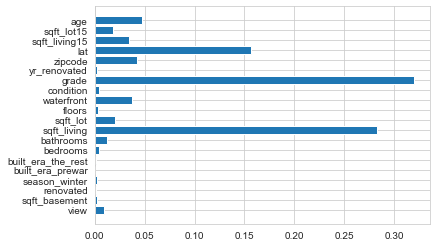

In [119]:
plt.barh(X.columns,tree.feature_importances_);

In [120]:
sorted_col=tree.feature_importances_.argsort()

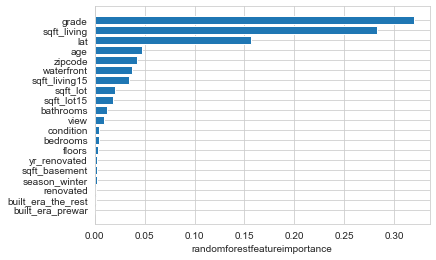

In [121]:
plt.barh(X.columns[sorted_col],tree.feature_importances_[sorted_col])
plt.xlabel("randomforestfeatureimportance");

# SUMMARY OF THE LESSON 

1. identify features which have high correlation - might not be independent 
- numbers correlation index, masked lowe triangle - find a matching pair, consider eliminating one
- categories - use chi sq test to look for relationship / significance , plot the crosstab - visually 

2. feature engineering - infer or calculate new features - increase the chance of predicting the variable
- simplifying the model - reducing column variation/ noise,eliminating outliers by redefining the column 
- this is about : can i get a better accuracy by creating a new column from the data i have ? 


3. use random forest to identify the features of significance 
- how much of an impact does x feature have on successfully predicting y 

